# Невронски мрежи и MNIST податочно множество
Подетални информации за податочното множество можете да најдете [тука](http://yann.lecun.com/exdb/mnist/).

## Повикување на библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
import tensorflow as tf

from sklearn.model_selection import train_test_split
from random import seed, randint
import cv2 # conda install -c anaconda opencv

seed(0)

Using TensorFlow backend.


## Вчитување и поделба на податоците

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=0)

In [4]:
print(f"X_train: {X_train.shape}")
print(f"ѕ_train: {y_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (40200, 28, 28)
ѕ_train: (40200,)
X_val: (19800, 28, 28)
y_val: (19800,)
X_test: (10000, 28, 28)
y_test: (10000,)


## Визуелизација на податоците

<AxesSubplot:ylabel='count'>

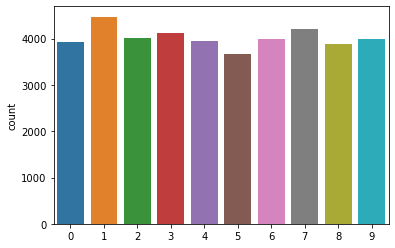

In [5]:
sns.countplot(x=y_train)

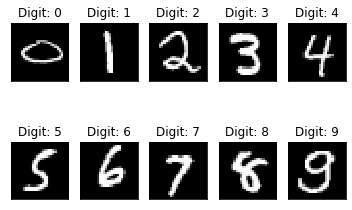

In [6]:
fig = plt.figure()
for i in range(10):
    r = randint(0, X_train[y_train == i].shape[0] - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[y_train == i][r], cmap='gray', interpolation='None')
    plt.title(f"Digit: {y_train[y_train == i][r]}")
    plt.xticks([])
    plt.yticks([])

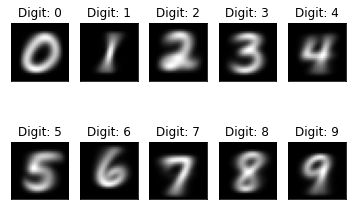

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[y_train == i].mean(axis=0), cmap='gray')
    plt.title(f"Digit: {i}")
    plt.xticks([])
    plt.yticks([])

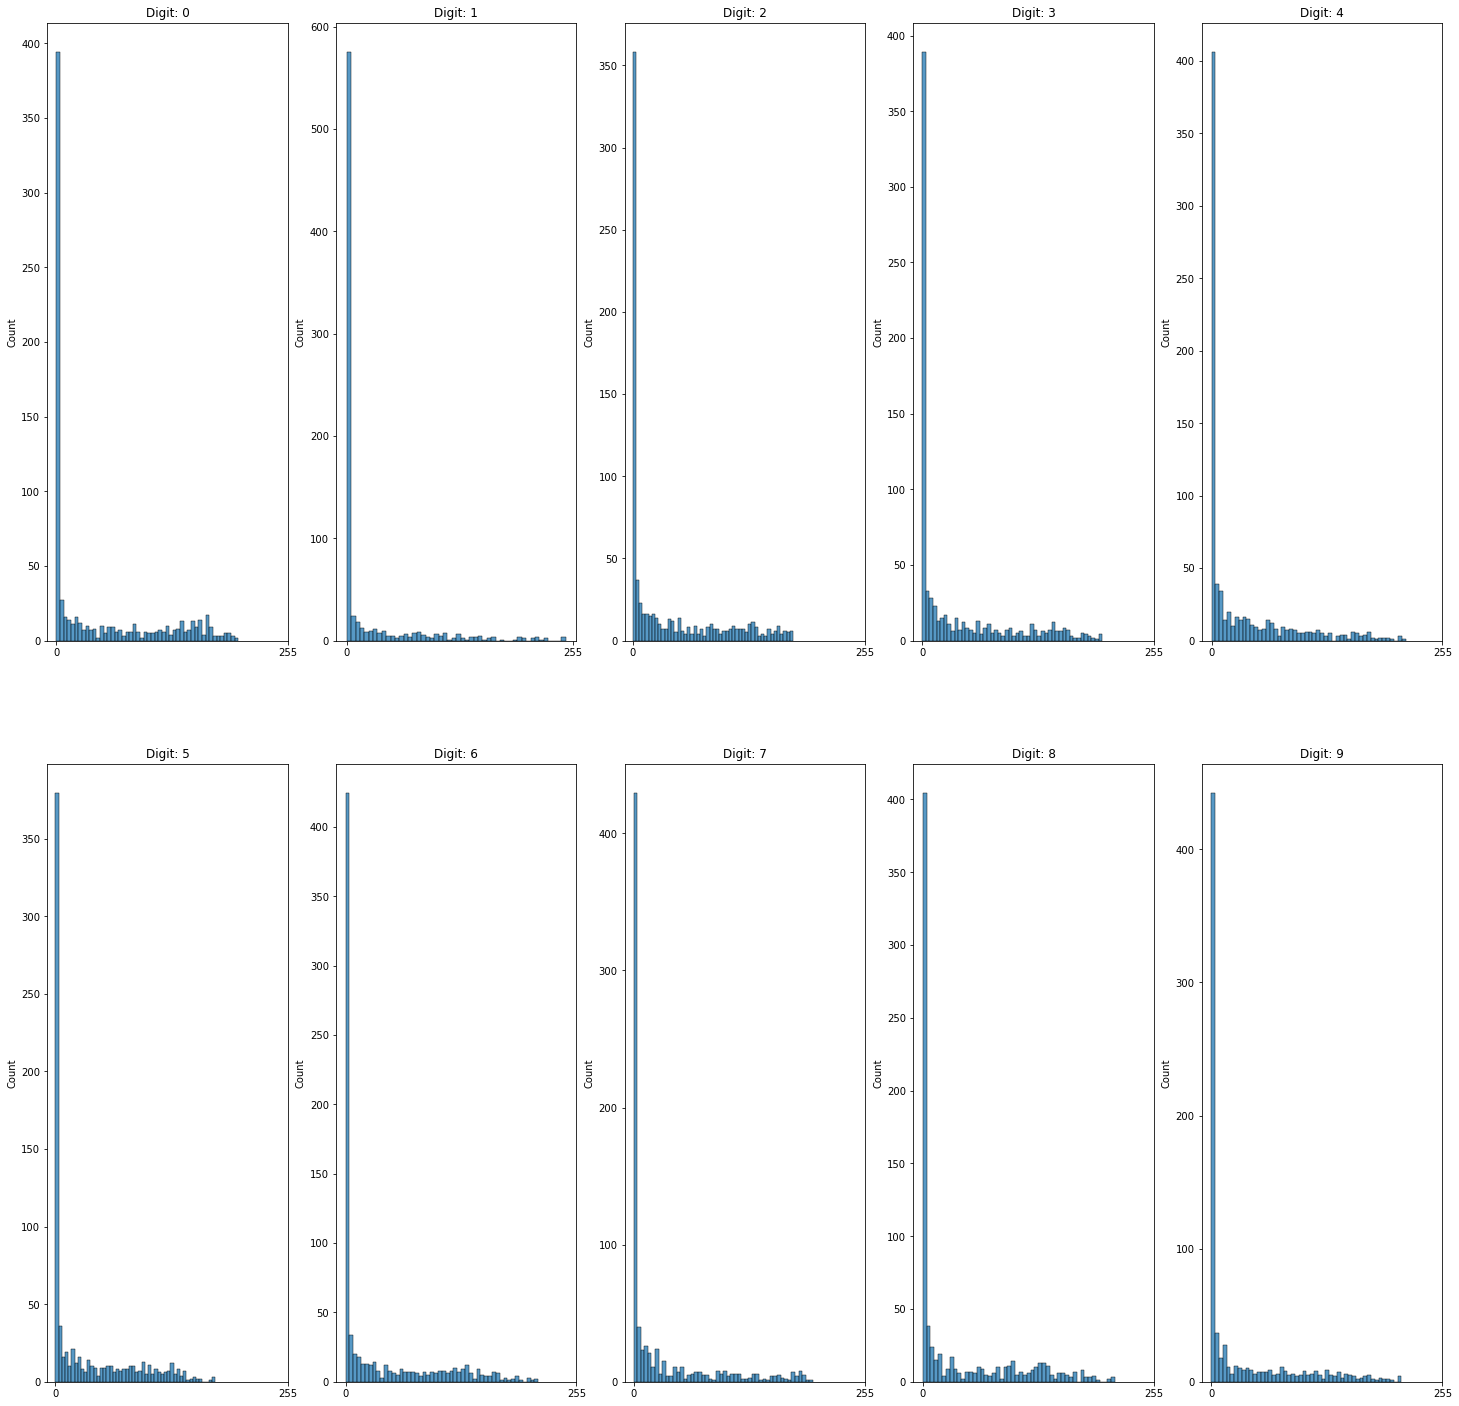

In [8]:
fig = plt.figure(figsize=(25, 25))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sns.histplot(X_train[y_train == i].mean(axis=0).ravel(), bins=50)
    plt.title(f"Digit: {i}")
    plt.xticks([0, 255])

## Припрема и скалирање на множеството

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_val = X_val.reshape(X_val.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [10]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [11]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)
#y_test = np_utils.to_categorical(y_test, n_classes)

In [14]:
y_train.shape

(40200, 10)

In [15]:
X_train.shape

(40200, 784)

## Припрема на невронската мрежа
Со цел да ги прикажеме недостатоците од преголема и мала невронска мрежа ќе истренираме две такви мрежи.
### Проблем на многу мала невронска мрежа
Иако мрежата е лесна за тренирање сепак не е доволно голема за да најде значајни карактеристики кои би го олесниле предвидувањето. Ваквите мрежи најчесто се карактеризираат со помала точност, но сепак се полесни за тренирање. Нема арбитрарна големина која ќе каже што значи една мрежа да е мала, но сепак може да го земете условот: бројот на неврони да биде значајнo помал од бројот на влезови.

**Изградете модел на ваква мрежа и проверете ги резултатите**

In [16]:
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))

### Проблем на многу голема невронска мрежа
Логично би било резонирањето дека колку невронската мрежа e поголема  тогаш таа ќе наоѓа повеќе позначајни карактеристики и ќе ги искористува за добро предвидување. Сепак мора да се земе предвид дека овие мрежи се тешки за тренирање, а најчесто и тежнеат да бидат претренирани(overfitting). За таа намена keras нуди **Dropout** функција која што при тренирање во секоја итерација ќе игнорира определено количество на неврони со цел да не се фокусира на тренирање само на мало подмножество на неврони кои ќе ја доведат мрежата во состојба на претренираност. Примената на Dropout функцијата може да ја интерпретирате како уште еден начин на регуларизација. Доколку сакате да применувате стандардна регуларизација за секој слој индивидуално тогаш можете да ја користите следната функција **ActivityRegularization**. Нема арбитрарна големина која ќе каже што значи една мрежа да е голема, но сепак може да го земете условот: бројот на неврони да биде значајно поголем од бројот на влезови.


**Изградете модел на ваква мрежа и проверете ги резултатите**

In [17]:
model = Sequential()
model.add(Dense(100000, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))

### Идеална невронска мрежа
Не постои нешто такво како идеална невронска мрежа. Дури и да сте ја нашле најдобрата мрежа од вашето множество на предходно тренирани модели, никој не гарантира дека таа е идеалната. Не постојат правила за како да добиете идеална невронска мрежа, се' се сведува на проба и грешка преку менување на нејзината конструкција и нејзините хиперпараметри за тренирање. Доколку го познавате на значењето на хиперпараметрите тогаш полесно ќе стигнете до разумно решение на проблемот во спротивно може да изгубите повеќе време.

**Добар почеток за тренирање на една мрежа е да се додаде слој кој има нешто помалку неврони од бројот на влезови.**

In [18]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax')) # користете softmax доколку имате повеќе од две класи за класификација

### Тренирање на мрежата

Повеќе информации за менување на стапката на учење(learning_rate) според Нестеров на следниот [линк](http://proceedings.mlr.press/v28/sutskever13.pdf).
Идејата е да се искористи поимот на инерција од реалниот свет и да се додаде при учењето на алгоритмот така што промената на тежините на мрежата ќе имаат инерција и нема слепо да се менуваат според градиентот. Ова ќе намали веројатноста тренирањето да падне во локален минимум, а исто така може и да го забрза процесот на учење.

In [19]:
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer=keras.optimizers.SGD(learning_rate=0.05, momentum=0.4, nesterov=True)) # алгоритмите како rmsprop и adam често водат до подобри резултати во тренирањето

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_val, y_val))
# поголема вредност за batch_size може да ја забрза конвергенцијата и даде подобри резултати. Преголема вредност може да предизвика overfitting
# Зголемете го бројот на епохи доколку анализата на тренирањето ви го потврди тоа

Train on 40200 samples, validate on 19800 samples
Epoch 1/30
40200/40200 [==============================] - 1s 31us/step - loss: 0.5406 - accuracy: 0.8632 - val_loss: 0.3988 - val_accuracy: 0.8821
Epoch 2/30
40200/40200 [==============================] - 1s 28us/step - loss: 0.2972 - accuracy: 0.9174 - val_loss: 0.3840 - val_accuracy: 0.8786
Epoch 3/30
40200/40200 [==============================] - 1s 28us/step - loss: 0.2482 - accuracy: 0.9311 - val_loss: 0.2362 - val_accuracy: 0.9308
Epoch 4/30
40200/40200 [==============================] - 1s 27us/step - loss: 0.2130 - accuracy: 0.9410 - val_loss: 0.2137 - val_accuracy: 0.9390
Epoch 5/30
40200/40200 [==============================] - 1s 29us/step - loss: 0.1875 - accuracy: 0.9482 - val_loss: 0.1894 - val_accuracy: 0.9458
Epoch 6/30
40200/40200 [==============================] - 1s 29us/step - loss: 0.1668 - accuracy: 0.9542 - val_loss: 0.1758 - val_accuracy: 0.9505
Epoch 7/30
40200/40200 [==============================] - 1s 31us/st

## Анализа на тренирањето
Визуелизација на процесот на тренирање може да ви каже дали моделот конвергирал или не. Доколку тој не конвергирал тогаш треба да го зголемите бројот на епохи за продолжите со тренирање. Ова го гледате според тоа дали наклонот на кривата на точноста води кон нејзино зголемување. 

Земете во предвид дека некогаш моделот може да има висока точност, но исто така и висока функција на цена. Ова се случува поради самата природа на Log функцијата која може да даде многу високи вредности за мал дел на точки од множеството кои значително ќе го зголемат просекот на функцијата на цена. Во вакви случаи точноста е померодавна од функцијата на цена бидејќи вас не ве интересира дали моделот предвидува лошо за мал број на слики туку дали ги предвидува точно поголемиот број на слики од множеството. Сепак ова зависи од проблемот кој се обидувате да го решите.

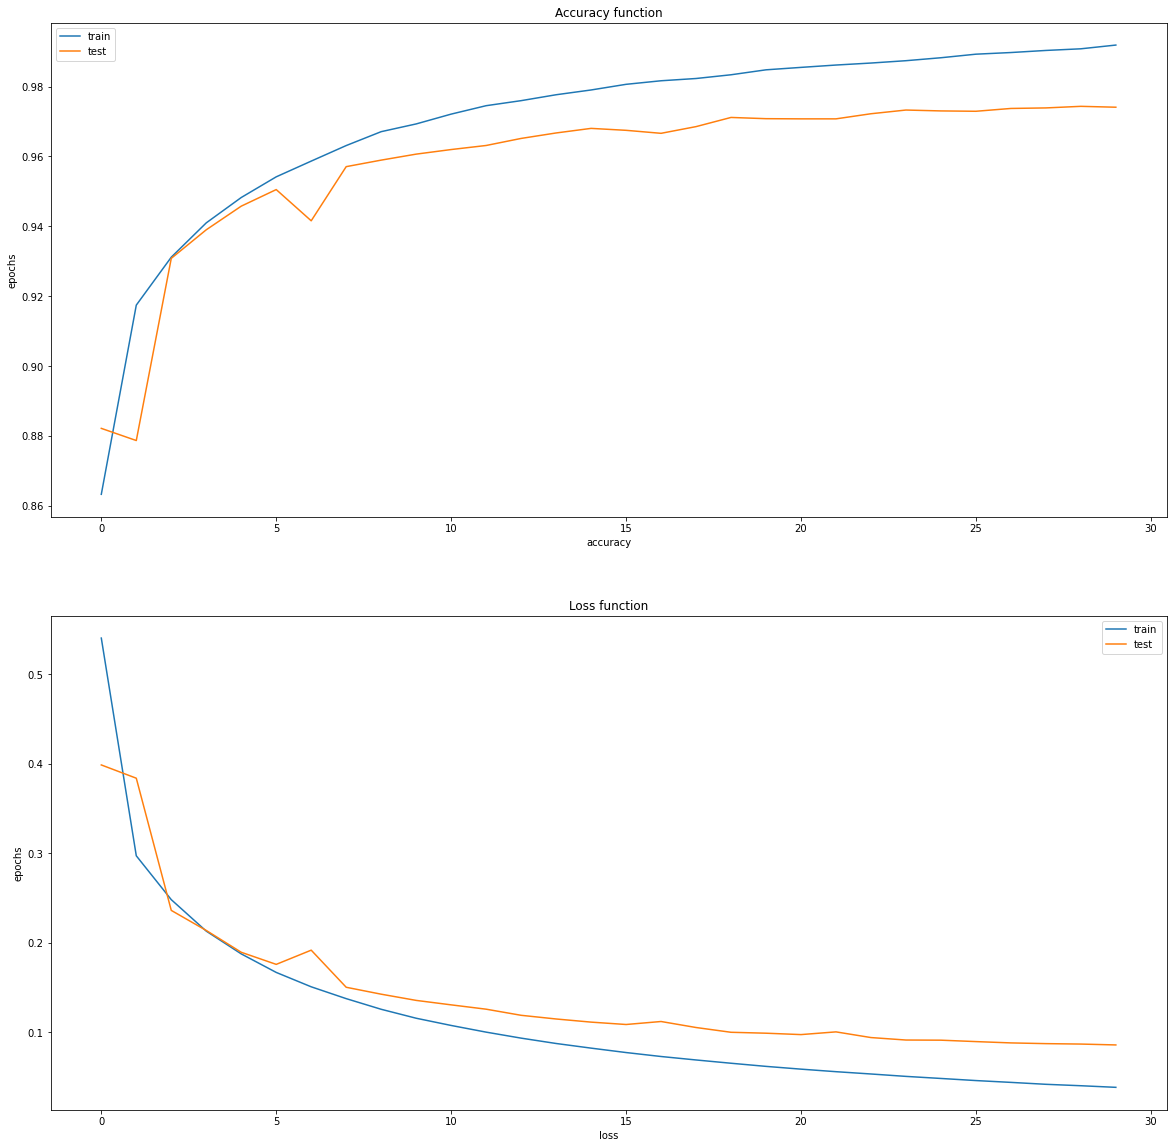

In [21]:
fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy function')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend(['train', 'test'])

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['train', 'test'])

## Евалуација
Кога ќе одлучите дека сте задоволни од вашиот истрениран модел, добро е да ги проверите неговите способности на множество кое не го видел предходно. За тоа ќе го примениме предходно дефинираното множество за тестирање. Не е препорачливо да го проверувате моделот многу често на ова множество. Колку повеќе го проверувате толку поголема е шансата за overfitting. Ако морате, тогаш поделбата на множеството(train_test_split)  правете ја со различно семе(seed) секој пат.

In [22]:
print("Функцијана на цена и процент на точно класифицирани слики: ", model.evaluate(X_test, np_utils.to_categorical(y_test), verbose=2))

Функцијана на цена и процент на точно класифицирани слики:  [0.07914092839118093, 0.9758999943733215]


In [23]:
predicted = model.predict_classes(X_test)
print("Број на точно и погрешно класифицирани слики: ", y_test[predicted == y_test].shape, y_test[predicted != y_test].shape)

Број на точно и погрешно класифицирани слики:  (9759,) (241,)


In [24]:
predicted

array([7, 2, 1, ..., 4, 5, 6])

### Прикажување на точно класифицирани слики

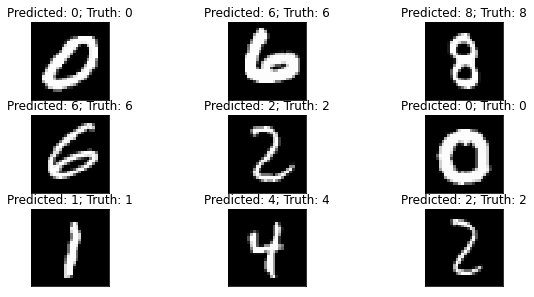

In [25]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    r = randint(0, X_test[predicted == y_test].shape[0] - 1)
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[predicted == y_test][r].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted[predicted == y_test][r]}; Truth: {y_test[predicted == y_test][r]}")
    plt.xticks([])
    plt.yticks([])

### Прикажување на погрешно класифицирани слики

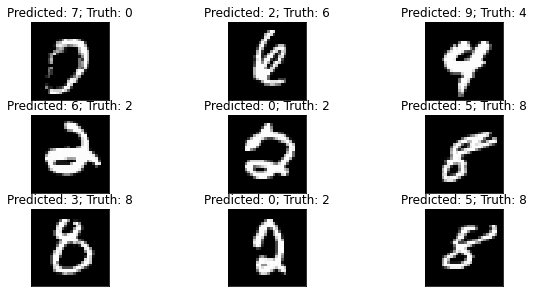

In [26]:
fig = plt.figure(figsize=(10, 10))
# plot 9 incorrect predictions
for i in range(9, 18):
    r = randint(0, X_test[predicted != y_test].shape[0] - 1)
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[predicted != y_test][r].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted[predicted != y_test][r]}; Truth: {y_test[predicted != y_test][r]}")
    plt.xticks([])
    plt.yticks([])

# Зголемување на податочното множество (Data augmentation)
Доколку не сме задоволни од резултатите на моделот тогаш постојат повеќе фактори кои можат да бидат причина за тоа:
1. Лош избор на модел
2. Лошо истрениран модел
3. Потреба од карактеристики кои ќе носат повеќе информација за моделот
4. Мало множество за тренирање

Секоја од горе наведените причини може да се третира посебно, а во овој дел ние ќе се фокусираме само на последната. Многу често точноста на моделот може да биде подобрена со помош на поголемо податочно множество. Поголемо податочно множество подразбира да имаме поголем увид во различни слики кои што ќе го зголемат видикот на моделот и при тоа ќе овозможат да генерализира подобро.
Зголемувањето на податочното множество во многу реално случаи е невозможно или побарува огромно количество на работа. Тука ќе покажеме техника за зголемување која што е многу лесна, а при тоа може и да ја подобри точноста на моделот.

Од визуелизацијата на податоците увидовме дека цифрите на сликите може да бидат прикажни малку полево или подесно во однос на другите. Исто така може да се случи и некоја цифра да бида малку повеќе ротирана од друга.

**Воочете ја разликата помеѓу двете цифри на сликата во долната ќелија. Едната цифра има ротација во однос на другата. Според тоа, доколку во множеството има многу малку ротирани 9-ки под ист агол тогаш мрежата нема да може добро да предвидува на такви цифри. За таа намена ќе го зголемиме податочното множество така што тековните слики дополнително ќе ги ротираме и транслираме. За оваа наме ќе ја искористиме библиотеката за процесирање на слика OpenCV.**

([], [])

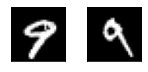

In [27]:
# постоење на ротација во цифрите
plt.figure(figsize=(2.5, 1))
plt.subplot(1, 2, 1)
plt.imshow(X_test[9].reshape(28,28), cmap='gray', interpolation=None)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(X_test[7].reshape(28,28), cmap='gray', interpolation=None)
plt.xticks([])
plt.yticks([])

## Транслација

([], [])

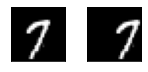

In [28]:
tmat = np.array([[1, 0, 7], 
               [0, 1, 0]], dtype=np.float32) 
plt.figure(figsize=(2.5, 1))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28,28), cmap='gray', interpolation=None)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(cv2.warpAffine(X_train[0].reshape(28,28), tmat, (28, 28)), cmap='gray', interpolation=None)
plt.xticks([])
plt.yticks([])

In [ ]:
dx_list = [1, 3, 5, 7, -1, -3, -5, -7]
X_train_trans = []
y_train_trans = []

for dx in dx_list:
    for image, cclass in zip(X_train, y_train):
        image = image.reshape(28, 28)
        tmat = np.float32([[1, 0, dx], 
                           [0, 1, 0]]) 
        X_train_trans.append(cv2.warpAffine(image, tmat, (28, 28)).reshape(28*28))
        y_train_trans.append(cclass)
        
X_train_trans = np.array(X_train_trans)
y_train_trans = np.array(y_train_trans)

## Ротација

([], [])

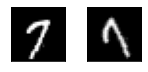

In [190]:
rotmat = cv2.getRotationMatrix2D((14, 14), 50, 1)
plt.figure(figsize=(2.5, 1))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28,28), cmap='gray', interpolation=None)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(cv2.warpAffine(X_train[0].reshape(28,28), rotmat, (28, 28)), cmap='gray', interpolation=None)
plt.xticks([])
plt.yticks([])

In [191]:
dtheta_list = [10, 20, 40, 60, -10, -20, -40, -60]
X_train_rots = []
y_train_rots = []

for dtheta in dtheta_list:
    for image, cclass in zip(X_train, y_train):
        image = image.reshape(28, 28)
        rotmat = cv2.getRotationMatrix2D((14, 14), dtheta, 1)
        X_train_rots.append(cv2.warpAffine(image, rotmat, (28, 28)).reshape(28*28))
        y_train_rots.append(cclass)
        
X_train_rots = np.array(X_train_trans)
y_train_rots = np.array(y_train_rots)

In [192]:
(X_train_trans.shape, X_train_rots.shape, y_train_trans.shape, y_train_rots.shape)

((321600, 784), (321600, 784), (321600, 10), (321600, 10))

In [193]:
X_train = np.vstack((X_train, X_train_trans, X_train_rots))
y_train = np.vstack((y_train, y_train_trans, y_train_rots))

# Тренирање и евалуација со зголемено податочно множество

In [194]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax')) # користете softmax доколку имате повеќе од две класи за класификација

In [195]:
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer=keras.optimizers.SGD(learning_rate=0.05, momentum=0.4, nesterov=True)) # алгоритмите како rmsprop и adam често водат до подобри резултати во тренирањето

In [196]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_val, y_val))
# поголема вредност за batch_size може да ја забрза конвергенцијата и даде подобри резултати. Преголема вредност може да предизвика overfitting
# Зголемете го бројот на епохи доколку анализата на тренирањето ви го потврди тоа

Train on 683400 samples, validate on 19800 samples
Epoch 1/30
683400/683400 [==============================] - 32s 47us/step - loss: 0.3100 - accuracy: 0.9166 - val_loss: 0.1422 - val_accuracy: 0.9597
Epoch 2/30
683400/683400 [==============================] - 20s 29us/step - loss: 0.1273 - accuracy: 0.9641 - val_loss: 0.1071 - val_accuracy: 0.9690
Epoch 3/30
683400/683400 [==============================] - 18s 27us/step - loss: 0.0931 - accuracy: 0.9736 - val_loss: 0.0999 - val_accuracy: 0.9704
Epoch 4/30
683400/683400 [==============================] - 15s 23us/step - loss: 0.0745 - accuracy: 0.9790 - val_loss: 0.0852 - val_accuracy: 0.9751
Epoch 5/30
683400/683400 [==============================] - 15s 22us/step - loss: 0.0620 - accuracy: 0.9827 - val_loss: 0.0767 - val_accuracy: 0.9769TA: 2s - loss: - ETA: 0s - loss: 0.0621 - accuracy - ETA: 0s - loss: 0.0621 - accuracy: 0. - ETA: 0s - loss: 0.0620 - accuracy: 0.
Epoch 6/30
683400/683400 [==============================] - 15s 22us/

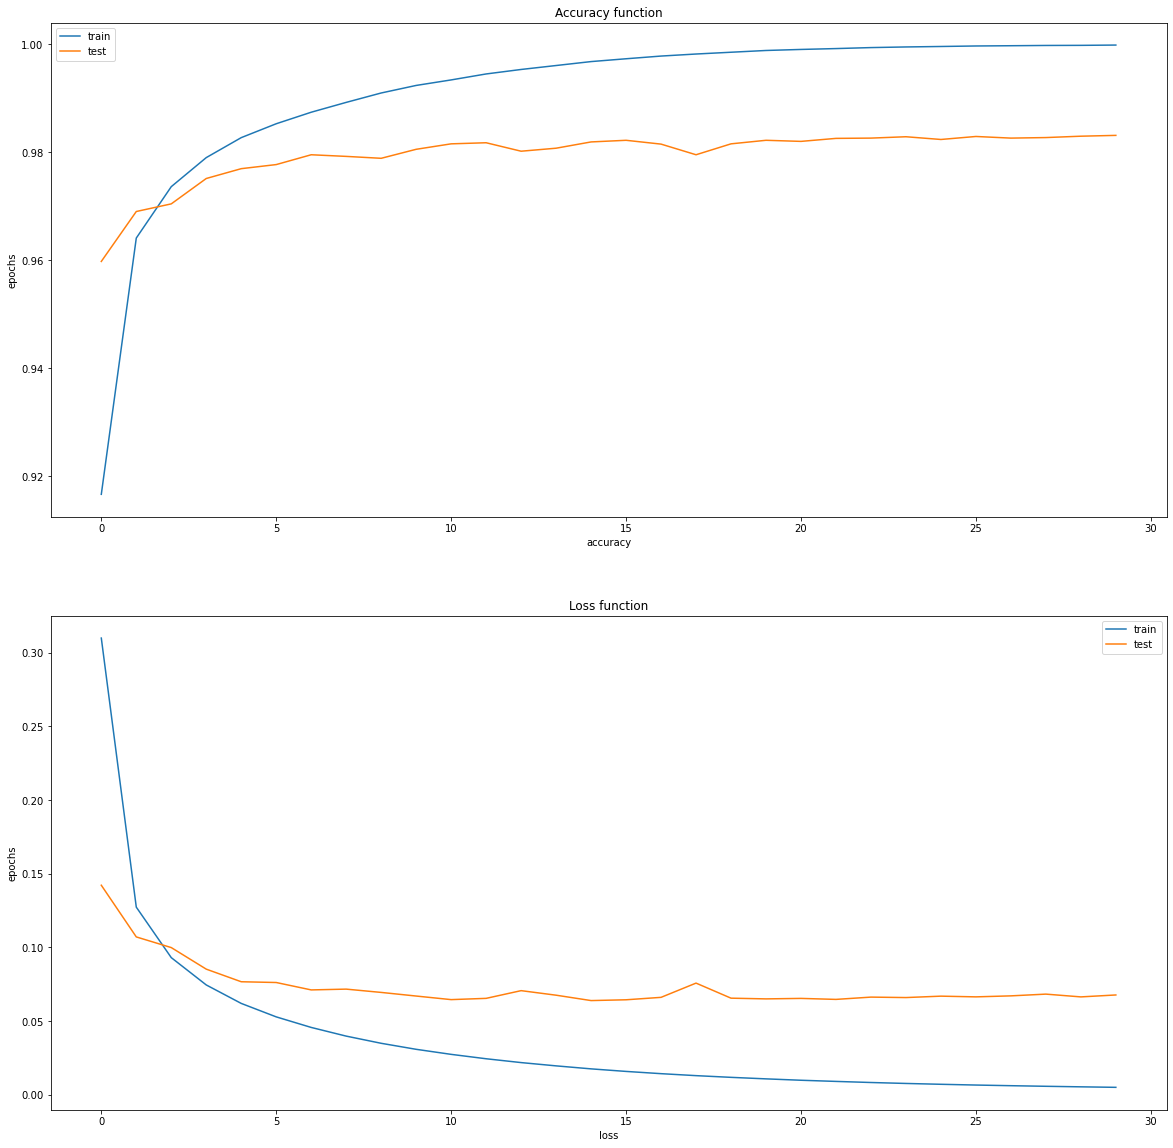

In [197]:
fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy function')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend(['train', 'test'])

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['train', 'test'])

In [198]:
print("Функција на цена и процент на точно класифицирани слики: ", model.evaluate(X_test, np_utils.to_categorical(y_test), verbose=2))

Функција на цена и процент на точно класифицирани слики:  [0.05514733398376557, 0.9835000038146973]


In [199]:
predicted = model.predict_classes(X_test)
print("Број на точно и погрешно класифицирани слики: ", y_test[predicted == y_test].shape, y_test[predicted != y_test].shape)

Број на точно и погрешно класифицирани слики:  (9835,) (165,)


In [200]:
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### Прикажување на точно класифицирани слики

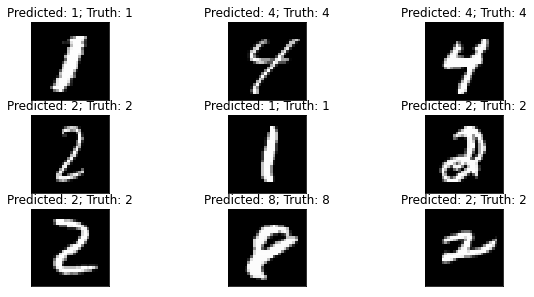

In [228]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    r = randint(0, X_test[predicted == y_test].shape[0] - 1)
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[predicted == y_test][r].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted[predicted == y_test][r]}; Truth: {y_test[predicted == y_test][r]}")
    plt.xticks([])
    plt.yticks([])

### Прикажување на погрешно класифицирани слики

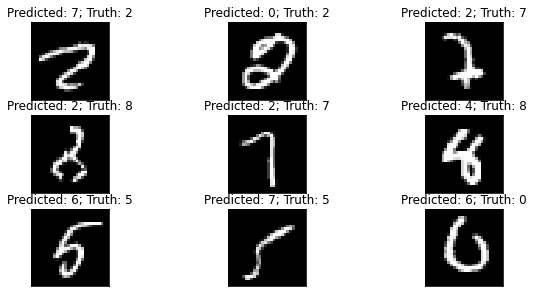

In [231]:
fig = plt.figure(figsize=(10, 10))
# plot 9 incorrect predictions
for i in range(9, 18):
    r = randint(0, X_test[predicted != y_test].shape[0] - 1)
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[predicted != y_test][r].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {predicted[predicted != y_test][r]}; Truth: {y_test[predicted != y_test][r]}")
    plt.xticks([])
    plt.yticks([])

Точноста на моделот трениран на обичното множество изнесува 0.976 додека, моделот трениран со зголемено множество има точност од 0.983. Со оглед на тоа дека множеството се зголеми 8 пати, разликата не е толку голема. Сепак, ефикасноста на оваа техника е евидентна.
Како следен чекор во подобрувањето на точноста на моделот може да се направи следното:
1. Прнајдете ги оние цифри кои моделот погрешно ги класифицира, а сепак се очигледни за човекот.
2. Генерирајте подмножество на овие цифри
3. Зголемете го ова подмножество така што ќе ги ротирате, транслирате и скалирате(зголемени и намалени).
4. Додадете го ова подмножество на множеството за тренирање и проверете ги резултатите

**Доколку целите кон модел кој ќе предвидува совршено тогаш го препорачуваме следниот [труд](https://arxiv.org/abs/1202.2745)**

# Зачувување и вчитување на моделот
Откако ќе добиете задоволителни резултати од моделот препорачливо е да го зачувате со цел да го имате за споредба со други идни модели. На крајот можете да го одберете најдобриот од сите зачувани. Исто така можете да примените и логистичка регресија каде на влез како карактеристики ќе бидат излезните резултати од сите модели за секоја точка. На овој начин ќе се добие тежинска низа од предвидувањата на сите модели која што може да биде подобра од само еден.

In [203]:
model.save('NN_1')

In [204]:
model = keras.models.load_model('NN_1')

Дополнителни детални информации околу теоријата на невронски мрежи можете да најдете во следнава [бесплатна онлајн книга](http://neuralnetworksanddeeplearning.com/index.html).